In [45]:
import pandas as pd

df = pd.read_csv('mock_training_data.csv')
df = df[df["seat_type"] != "mixed"].reset_index(drop=True)

In [46]:
df = df[['seat_count','seat_type','boarding_station','dropping_station','journey_day_of_week','booking_hour','has_meal','total_amount','confirmation_probability']]
temp = df.copy()

In [47]:
from sklearn.preprocessing import LabelEncoder

lblenc = LabelEncoder()
for i in ['seat_type', 'boarding_station', 'dropping_station']:
    temp[i] = lblenc.fit_transform(temp[i])

In [48]:
import seaborn as sns
import numpy as np
from sklearn.preprocessing import FunctionTransformer, PowerTransformer

tdd = FunctionTransformer(np.log1p, validate=False)
df['total_amount'] = tdd.fit_transform(df['total_amount'])

<Axes: >

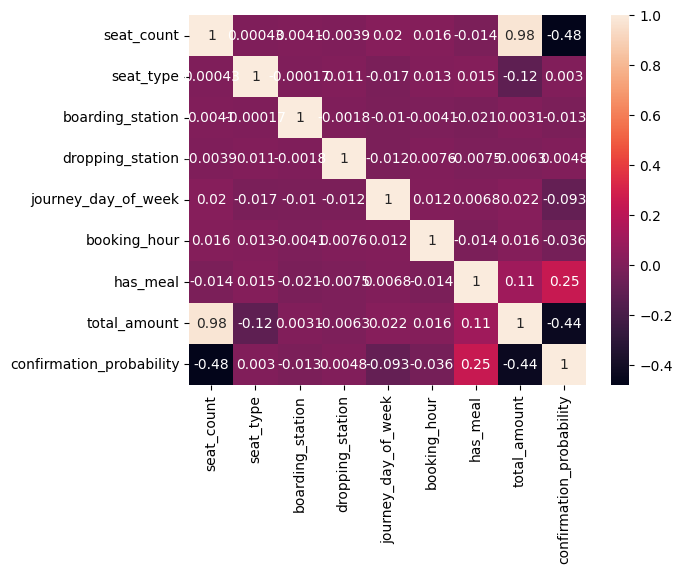

In [52]:
import seaborn as sns
sns.heatmap(temp.corr(), annot=True)

In [29]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [53]:
y = df['confirmation_probability']
X = df.drop(columns=["confirmation_probability"])


In [54]:
categorical_cols = [
    "seat_type",
    "boarding_station",
    "dropping_station"
]

numerical_cols = [
    col for col in X.columns if col not in categorical_cols
]


In [55]:
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
        ("num", "passthrough", numerical_cols)
    ]
)


In [56]:
model = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("regressor", LinearRegression())
    ]
)


In [57]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42,
)


In [58]:
model.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [59]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE  : {mae:.4f}")
print(f"RMSE : {rmse:.4f}")
print(f"R2   : {r2:.4f}")



MAE  : 0.7060
RMSE : 0.8472
R2   : 0.2761


In [189]:
import pickle

with open("Sleeper_Booking.pkl", "wb") as f:
    pickle.dump(model, f)

# ANN Model

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [14]:
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

input_dim = X_train_processed.shape[1]


In [15]:
model = Sequential([
    Dense(64, activation="relu", input_dim=input_dim),
    # Dropout(0.3),

    Dense(32, activation="relu"),
    # Dropout(0.2),

    Dense(1)  # Regression output
])

model.compile(
    optimizer="adam",
    loss="mse",
    metrics=["mae"]
)


In [16]:
history = model.fit(
    X_train_processed,
    y_train,
    validation_split=0.2,
    epochs=20,
    batch_size=32,
    # callbacks=[early_stop],
    verbose=1
)


Epoch 1/20
141/141 [==============================] - 3s 7ms/step - loss: 4501.0781 - mae: 48.2915 - val_loss: 1964.9460 - val_mae: 37.6454
Epoch 2/20
141/141 [==============================] - 1s 5ms/step - loss: 1883.5250 - mae: 37.1528 - val_loss: 1872.8723 - val_mae: 36.9702
Epoch 3/20
141/141 [==============================] - 1s 4ms/step - loss: 1799.9534 - mae: 36.2709 - val_loss: 1865.7506 - val_mae: 35.2727
Epoch 4/20
141/141 [==============================] - 1s 5ms/step - loss: 1631.6057 - mae: 34.3936 - val_loss: 1571.2822 - val_mae: 32.8376
Epoch 5/20
141/141 [==============================] - 1s 5ms/step - loss: 1372.7643 - mae: 31.3720 - val_loss: 1466.4198 - val_mae: 33.7285
Epoch 6/20
141/141 [==============================] - 1s 5ms/step - loss: 1124.1587 - mae: 28.0750 - val_loss: 1038.9550 - val_mae: 26.7737
Epoch 7/20
141/141 [==============================] - 1s 5ms/step - loss: 920.2237 - mae: 24.9416 - val_loss: 898.9794 - val_mae: 24.3873
Epoch 8/20
141/141 [==

In [17]:
y_pred = model.predict(X_test_processed)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE  : {mae:.4f}")
print(f"RMSE : {rmse:.4f}")
print(f"R2   : {r2:.4f}")


76/76 [==============================] - 0s 4ms/step
MAE  : 12.0282
RMSE : 14.9025
R2   : -4.8708
